# Sex-specific eQTL

In [1]:
library(tidyverse)
library(data.table)
library(VennDiagram)
library(ggsci)

Warning message:
“replacing previous import ‘lifecycle::last_warnings’ by ‘rlang::last_warnings’ when loading ‘tibble’”
Warning message:
“replacing previous import ‘lifecycle::last_warnings’ by ‘rlang::last_warnings’ when loading ‘hms’”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


Loading required package: grid

Loading required package: futile.logger



In [2]:
setwd("../results/")

### 1. HCP

**EUR**

In [3]:
df_m <- data.frame("HCP" = seq(5, 50, 5),
                   "Count" = NA, 
                   "Group" = "EUR male, n=141")
for (i in seq(5, 50, 5)) {
    df_m[i/5, "Count"] <- read.table(paste0("M_nominal_", i, "hcp/significant_feature_count.txt"))[,1]
}

In [4]:
df_m

HCP,Count,Group
<dbl>,<int>,<chr>
5,5379,"EUR male, n=141"
10,6453,"EUR male, n=141"
15,6967,"EUR male, n=141"
20,7058,"EUR male, n=141"
25,7074,"EUR male, n=141"
30,7110,"EUR male, n=141"
35,6942,"EUR male, n=141"
40,6876,"EUR male, n=141"
45,6544,"EUR male, n=141"


In [5]:
df_f <- data.frame("HCP" = seq(5, 50, 5),
                   "Count" = NA, 
                   "Group" = "EUR female, n=139")
for (i in seq(5, 50, 5)) {
    df_f[i/5, "Count"] <- read.table(paste0("F_nominal_", i, "hcp/significant_feature_count.txt"))[,1]
}

In [6]:
df <- rbind(df_m, df_f)

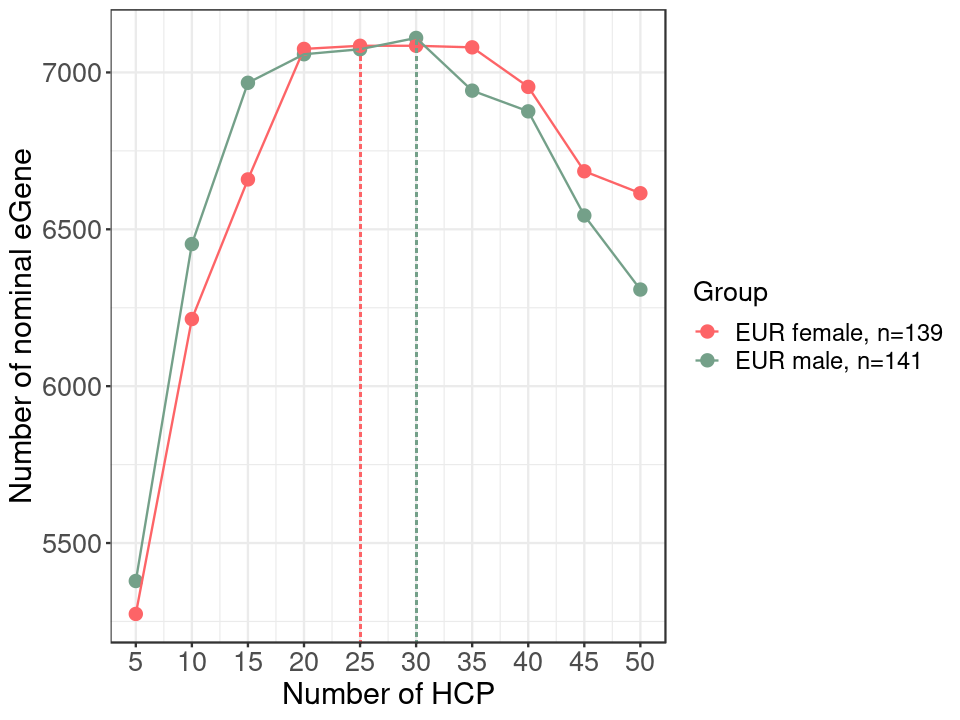

In [19]:
options(repr.plot.width = 8, repr.plot.height = 6)

ggplot(df, aes(x = HCP, y = Count, color = Group)) +
    geom_point(size = 3) +
    geom_line() +
    scale_x_continuous(breaks = seq(0,55,by = 5)) +
    geom_segment(x = 30, y = 0, xend = 30, yend = 7110, color = "#74A089", linetype = "dashed") +
    geom_segment(x = 25, y = 0, xend = 25, yend = 7085, color = "#FD6467", linetype = "dashed") +
    labs(x = "Number of HCP", y = "Number of nominal eGene") +
    theme_bw() +
    theme(axis.text = element_text(size=16),
          axis.title = element_text(size=18),
          plot.title = element_text(size=18, face="bold", hjust = 0.5),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14)) +
    scale_color_manual(values = c("#FD6467", "#74A089"))

In [20]:
ggsave("../figures/sex_nominal_eur.pdf", width = 8, height = 6)

**ALL**

In [3]:
df_m <- data.frame("HCP" = seq(10, 100, 10),
                   "Count" = NA, 
                   "Group" = "Male, n=332")
for (i in seq(10, 100, 10)) {
    df_m[i/10, "Count"] <- read.table(paste0("ALL_m_nominal_", i, "hcp/significant_feature_count.txt"))[,1]
}

In [4]:
df_f <- data.frame("HCP" = seq(10, 100, 10),
                   "Count" = NA, 
                   "Group" = "Female, n=297")
for (i in seq(10, 100, 10)) {
    df_f[i/10, "Count"] <- read.table(paste0("ALL_f_nominal_", i, "hcp/significant_feature_count.txt"))[,1]
}

In [5]:
df <- rbind(df_m, df_f)

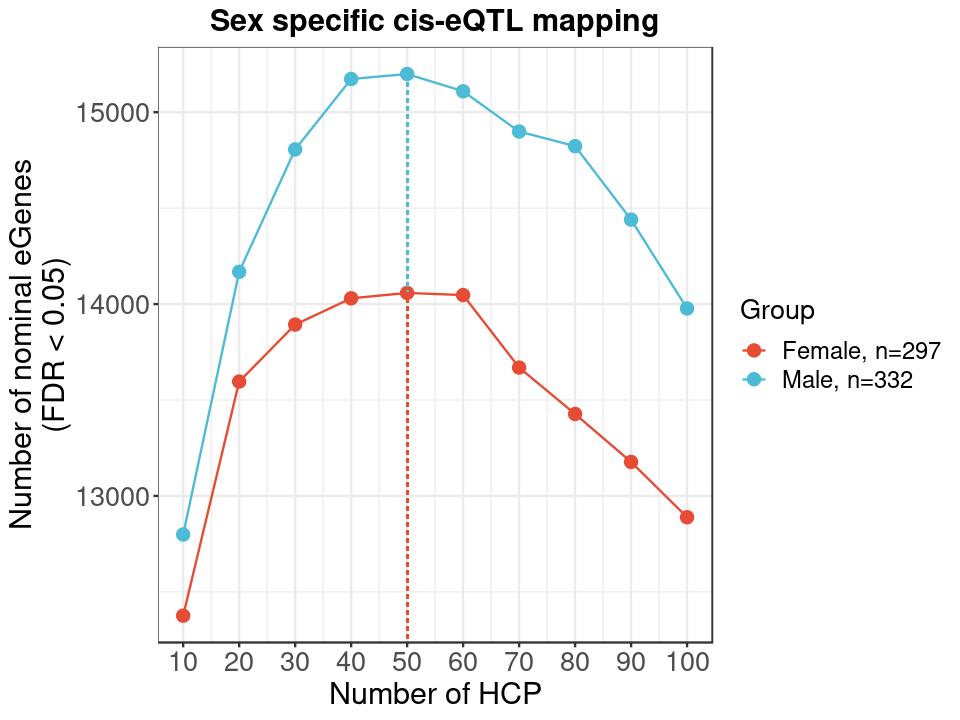

In [23]:
options(repr.plot.width = 8, repr.plot.height = 6)

ggplot(df, aes(x = HCP, y = Count, color = Group)) +
    geom_point(size = 3) +
    geom_line() +
    scale_x_continuous(breaks = seq(0,110,by = 10)) +
    geom_segment(x = 50, y = 0, xend = 50, yend = 15199, linetype = "dashed", color = "#4DBBD5FF") +
    geom_segment(x = 50, y = 0, xend = 50, yend = 14058, linetype = "dashed", color = "#E64B35FF") +
    labs(x = "Number of HCP", y = "Number of nominal eGenes\n(FDR < 0.05)",
         title = "Sex specific cis-eQTL mapping") +
    theme_bw() +
    theme(axis.text = element_text(size=16),
          axis.title = element_text(size=18),
          plot.title = element_text(size=18, face="bold", hjust = 0.5),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14)) +
#     scale_color_npg()
    scale_color_manual(values = c("#E64B35FF", "#4DBBD5FF"))

In [24]:
ggsave("../figures/sex_nominal.pdf", width = 8, height = 6)

In [3]:
female_df <- read.table("../../sqtl_new/results/outputs_fetal_ALL_sex_specific_sqtl_female/fetal_ALL_sex_specific_sqtl_female.cisnominal.wholeIntron.HCPtitration.table.txt", header = T)
male_df <- read.table("../../sqtl_new/results/outputs_fetal_ALL_sex_specific_sqtl_male/fetal_ALL_sex_specific_sqtl_male.cisnominal.wholeIntron.HCPtitration.table.txt", header = T)

In [8]:
df <- rbind(male_df, female_df)
df$Group <- c(rep("Male, n=335", 10), rep("Female, n=305", 10))

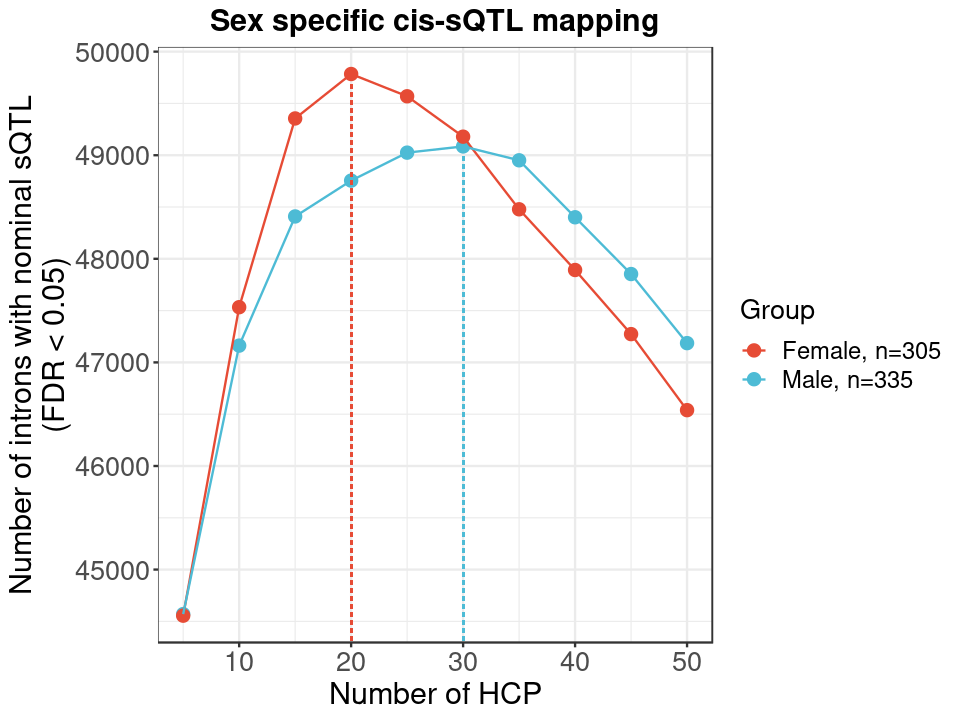

In [10]:
options(repr.plot.width = 8, repr.plot.height = 6)

ggplot(df, aes(x = n_hcps, y = n_introns_nominal, color = Group)) +
    geom_point(size = 3) +
    geom_line() +
    scale_x_continuous(breaks = seq(0,110,by = 10)) +
    geom_segment(x = 30, y = 0, xend = 30, yend = 49085, linetype = "dashed", color = "#4DBBD5FF") +
    geom_segment(x = 20, y = 0, xend = 20, yend = 49784, linetype = "dashed", color = "#E64B35FF") +
    labs(x = "Number of HCP", y = "Number of introns with nominal sQTL\n(FDR < 0.05)",
         title = "Sex specific cis-sQTL mapping") +
    theme_bw() +
    theme(axis.text = element_text(size=16),
          axis.title = element_text(size=18),
          plot.title = element_text(size=18, face="bold", hjust = 0.5),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14)) +
#     scale_color_npg()
    scale_color_manual(values = c("#E64B35FF", "#4DBBD5FF"))

In [11]:
ggsave("../../sqtl_new/figures/sex_nominal_sqtl.pdf", width = 8, height = 6)

### 2. eGene
- EUR: male 2405 eGene; female 2341; common 1231
- ALL: male 5681, female 5006, common 3499

In [3]:
male_gene <- fread("M_perm_30hcp/sig_pheno.txt", data.table = F)
female_gene <- fread("F_perm_30hcp/sig_pheno.txt", data.table = F)

In [4]:
sum(unique(male_gene$pid) %in% unique(female_gene$pid))
length(unique(male_gene$pid))
length(unique(female_gene$pid))
dim(male_gene)
dim(female_gene)

[1] 1231

[1] 2405

[1] 2341

[1] 2405   13

[1] 2341   13

png 
  2

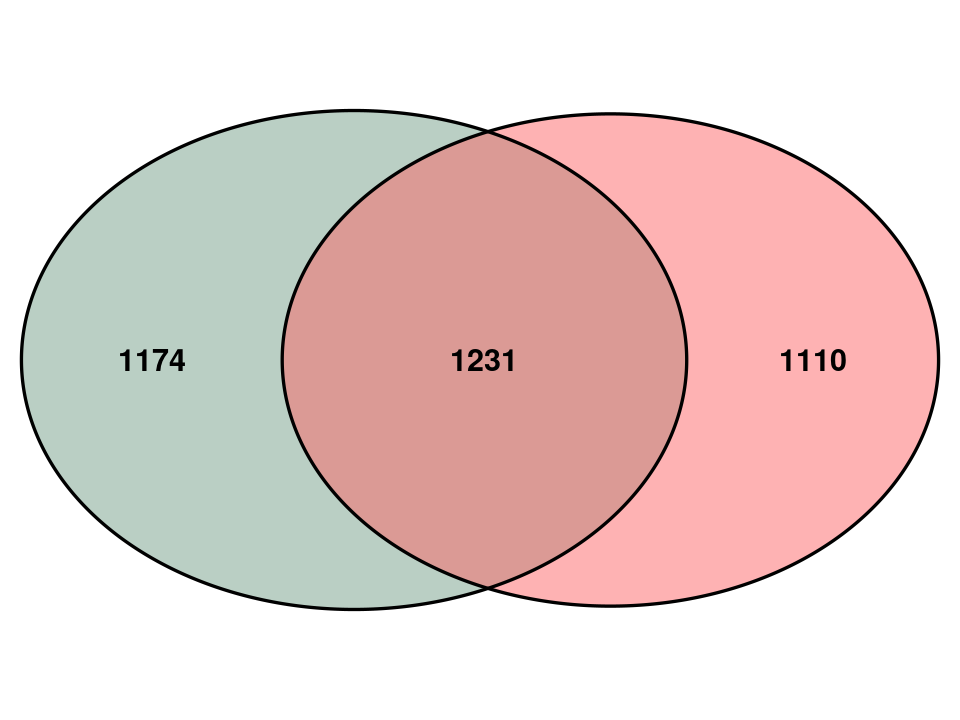

In [21]:
# area1, area2, n12
venn.plot <- draw.pairwise.venn(2341, 2405, 1231, 
                              fill = c("#FD6467", "#74A089"),
                              alpha = c(.5,.5),
                              cex = 1.5,
                              fontface = 2,
                              fontfamily = rep("sans",3),
                              category = c("", ""), 
                              scaled = TRUE,
                              )
pdf("../figures/sex_egene_eur.pdf", width = 4, height = 4)
grid.draw(venn.plot)
dev.off()

**ALL**

In [18]:
male_gene <- fread("ALL_m_perm_50hcp/sig_pheno.txt", data.table = F)
female_gene <- fread("ALL_f_perm_50hcp/sig_pheno.txt", data.table = F)

In [19]:
bulk <- fread("mixed_perm_90hcp/sig_pheno.txt", data.table = F)

In [20]:
sum(unique(bulk$pid) %in% unique(male_gene$pid)) #n12
sum(unique(male_gene$pid) %in% unique(female_gene$pid)) #n23
sum(unique(bulk$pid) %in% unique(female_gene$pid)) #n13
length(Reduce(intersect, list(unique(bulk$pid),
                              unique(male_gene$pid),
                              unique(female_gene$pid)))) #n123

[1] 5085

[1] 3499

[1] 4460

[1] 3483

In [7]:
sum(unique(male_gene$pid) %in% unique(female_gene$pid))
length(unique(male_gene$pid)) #n2
length(unique(female_gene$pid)) #n3
dim(male_gene)
dim(female_gene)

[1] 3499

[1] 5681

[1] 5006

[1] 5681   13

[1] 5006   13

png 
  2

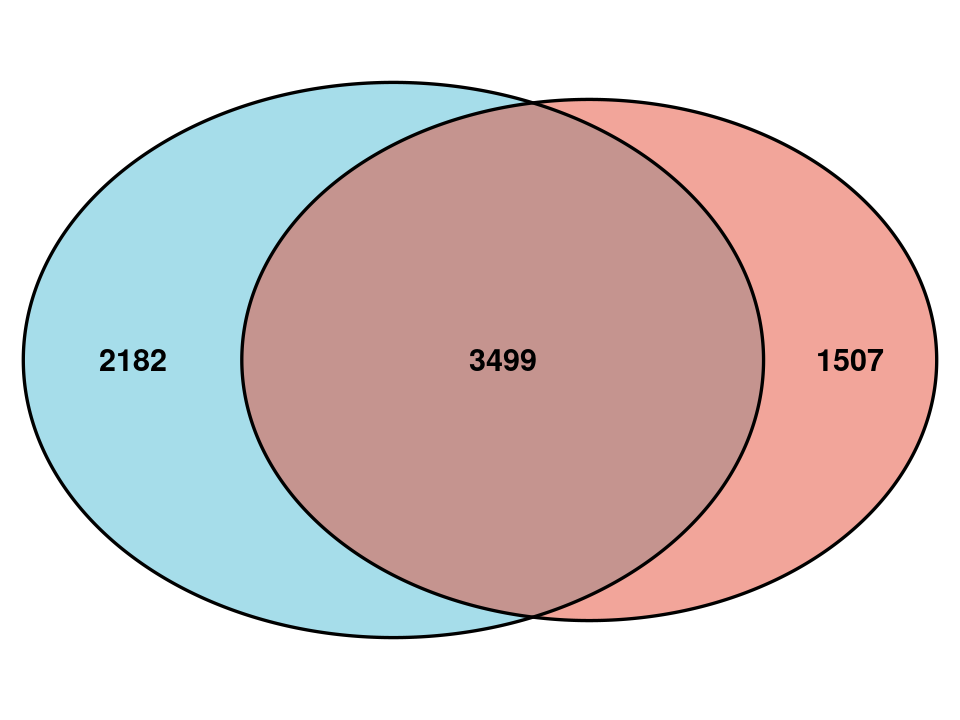

In [22]:
# area1, area2, n12
venn.plot <- draw.pairwise.venn(5006, 5681, 3499, 
                              fill = c("#E64B35FF", "#4DBBD5FF"),
                              alpha = c(.5,.5),
                              cex = 1.5,
                              fontface = 2,
                              fontfamily = rep("sans",3),
                              category = c("", ""), 
                              scaled = TRUE,
                              )
pdf("../figures/sex_egene.pdf", width = 4, height = 4)
grid.draw(venn.plot)
dev.off()

png 
  2

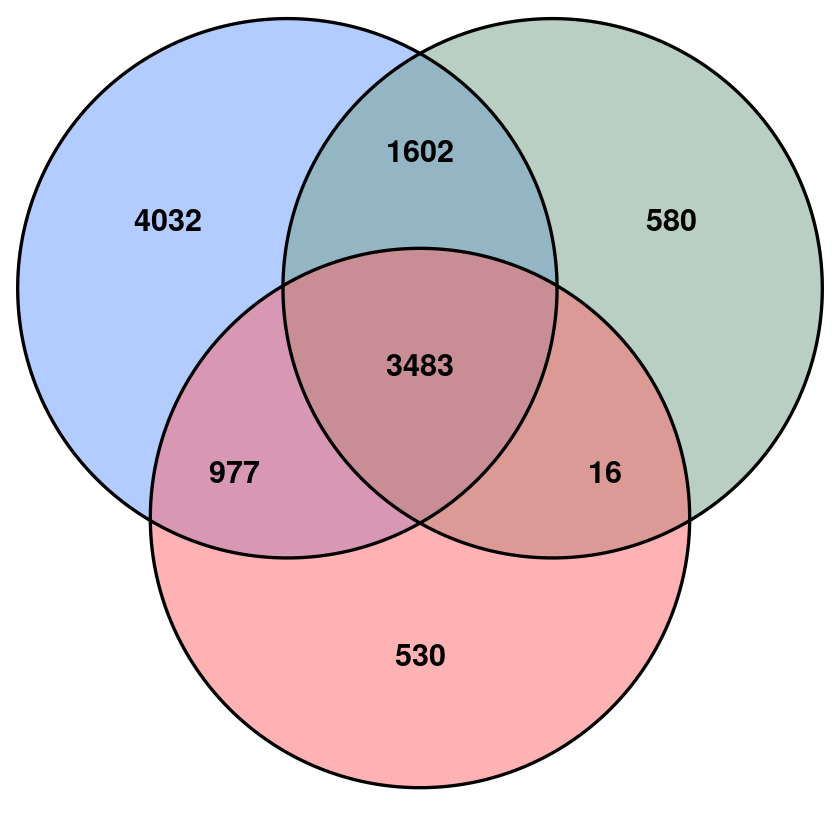

In [9]:
myCol <- c("#6699FF", "#74A089", "#FD6467")
# area1, area2, area3, n12, n23, n13, n123
venn.plot <- draw.triple.venn(10094, 5681, 5006, 5085, 3499, 4460, 3483, 
                              fill = myCol,
                              alpha = c(.5,.5,.5),
                              cex = 1.5,
                              fontface = 2,
                              fontfamily = rep("sans",7),
                              category = c("", "", ""), 
                              scaled = TRUE)
pdf("../figures/bulk_sex_egene.pdf", width = 4, height = 4)
grid.draw(venn.plot)
dev.off()

### 3: gProfiler
Input file:
- gene IDs
- SNP IDs
- chromosomal intervals

Questions:
- interval strand?
- multi query? Comparative?
- Exclusive lists? Or male, female-specific

In [4]:
shared <- intersect(unique(male_gene$pid), unique(female_gene$pid))
length(shared)

[1] 3499

In [5]:
male_only <- setdiff(unique(male_gene$pid), shared)
length(male_only)
female_only <- setdiff(unique(female_gene$pid), shared)
length(female_only)

[1] 2182

[1] 1507

In [11]:
write.table(data.frame(shared), "ALL_m_perm_50hcp/shared_egene.txt", 
            col.names = F, row.names = F, quote = F, sep = "\t")
write.table(data.frame(male_only), "ALL_m_perm_50hcp/male_only_egene.txt", 
            col.names = F, row.names = F, quote = F, sep = "\t")
write.table(data.frame(female_only), "ALL_f_perm_50hcp/female_only_egene.txt", 
            col.names = F, row.names = F, quote = F, sep = "\t")

### 4: sex-specific eGene

In [3]:
expr <- fread("../../TWAS/data/all_gene_exp_regressed.txt", data.table = F)
meta <- read.table("../metadata_654.tsv", header = T)
head(meta)
meta <- meta %>% filter(Subject %in% colnames(expr))

,Subject,Age,Sex,inferSex,trimester,ancestry,study
,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>
1,HSB100,-0.4027397,F,F,2,afr,werling
2,HSB152,-0.4602740,M,M,2,eur,werling
3,HSB195,-0.4219178,M,M,2,eur,werling
4,HSB221,-0.4027397,F,F,2,amr,werling
5,HSB222,-0.4823288,F,F,2,eur,werling
6,HSB238,-0.4794521,F,F,2,amr,werling


In [70]:
expr.gene <- expr %>% filter(TargetID == "ENSG00000021762") %>% select(meta$Subject)
df <- t(expr.gene) %>% as.data.frame()
dim(df)

[1] 629   1

`zcat filtered.hg19.sorted.removeGeneOutlier.dose.tsv.gz | awk 'NR == 1 || ($1 == 4 && $2 == 165960297) {print}' > rs138259409_dose.tsv`

In [71]:
dose.sid <- read.table("~/project-gandalm/isoform_twas/genotype/all_data/isec_R2_greater_than_3/ancestry/rs12362578_dose.tsv", check.names = F, header = T)
dose.sid
dim(dose.sid)

CHROM,POS,REF,ALT,849,898,1038,1039,1046,1102,...,RNAID2099,RNAID2100,RNAID2101,RNAID2102,RNAID2103,RNAID2111,RNAID2139,RNAID2141,RNAID2142,RNAID2144
<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
11,3114307,G,C,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


[1]   1 633

In [72]:
dose.sid <- dose.sid %>% select(meta$Subject)
dose.sid <- as.data.frame(t(dose.sid))
df$Genotype <- dose.sid[,1]
dim(df)

[1] 629   2

In [73]:
df$Sex <- meta$inferSex
table(df$Sex)


  F   M 
297 332 

In [74]:
df$Sex <- as.factor(df$Sex)
df$Genotype <- as.factor(df$Genotype)
table(df$Genotype, df$Sex)

   
      F   M
  0 232 274
  1  64  56
  2   1   2

In [75]:
colnames(df) <- c("OSBPL5", "rs12362578", "Sex")
# levels(df$rs749424088) <- c(levels(df$rs749424088), "G/G", "A/G", "A/A")
# df$rs146862216[df$rs749424088 == 0] <- 'G/G'
# df$rs146862216[df$rs749424088 == 1] <- 'A/G'
# df$rs146862216[df$rs749424088 == 2] <- 'A/A'

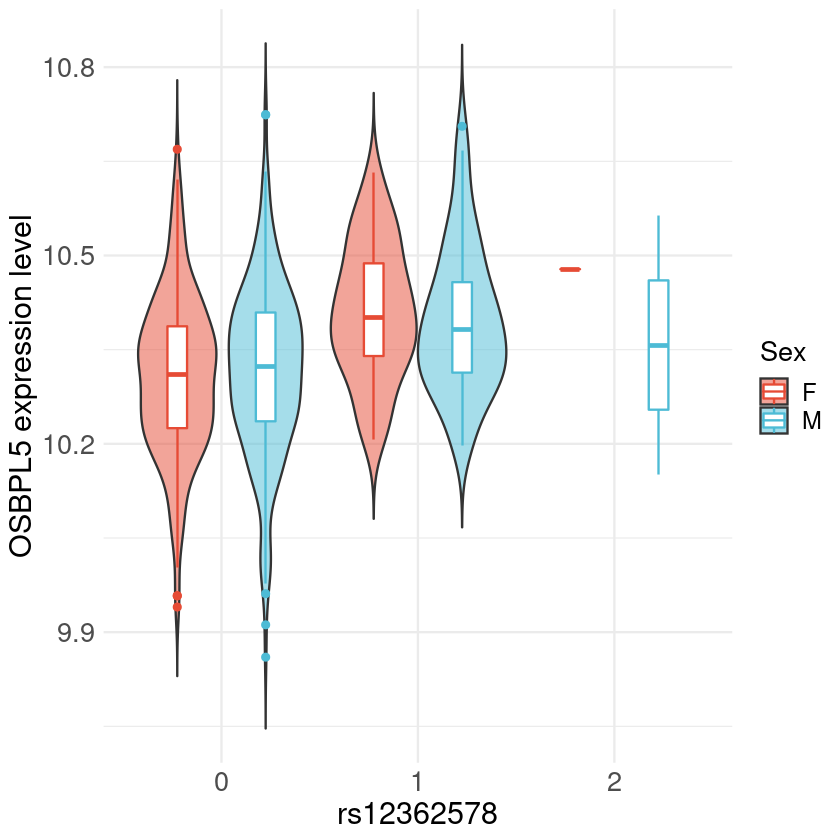

In [76]:
ggplot(df, aes(x = rs12362578, y = OSBPL5)) +
#     geom_jitter(aes(color = Trimester)) +
#     geom_point(aes(color = Trimester), 
#                position = position_jitterdodge(jitter.width = 0.15,
#                                                dodge.width = 0.9)) +
    geom_violin(aes(fill = Sex), trim = FALSE, alpha = 0.5) +
    geom_boxplot(aes(color = Sex), width = 0.2, position = position_dodge(width = 0.9)) +
    labs(y = "OSBPL5 expression level") + 
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14)) +
    scale_fill_manual(values = c("#E64B35FF", "#4DBBD5FF")) +
    scale_color_manual(values = c("#E64B35FF", "#4DBBD5FF")) 